In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### The test data consists of the same columns as the train data, excluding the "Survived" column

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Only 38.4% of all passengers survived, the average age was somewhere around 30 years

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Age, Cabin and Embarked are missing some values

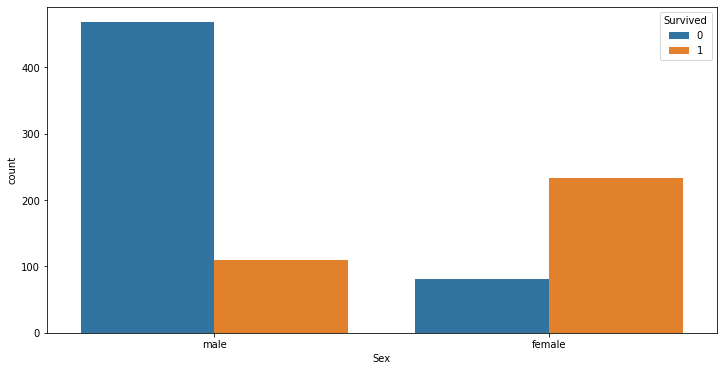

18.89% of males survived.
74.20% of females survived.


In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.show()
for sex in train_data['Sex'].unique():
    total = train_data[train_data['Sex'] == sex].shape[0]
    survived = train_data[(train_data['Sex'] == sex) & (train_data['Survived'] == 1)].shape[0]
    print(f'{(survived/total)*100:.2f}% of {sex}s survived.')

#### Females had a greater survival rate than males, which makes sense according to the "Women and children first" code of conduct

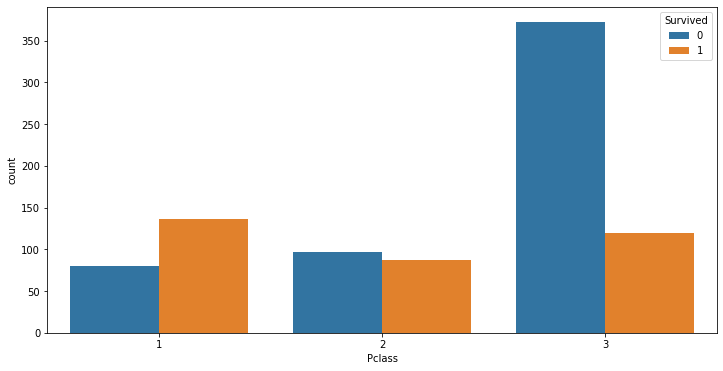

24.24% of people having 3 class ticket survived.
62.96% of people having 1 class ticket survived.
47.28% of people having 2 class ticket survived.


In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.show()
for pclass in train_data['Pclass'].unique():
    total = train_data[train_data['Pclass'] == pclass].shape[0]
    survived = train_data[(train_data['Pclass'] == pclass) & (train_data['Survived'] == 1)].shape[0]
    print(f'{(survived/total)*100:.2f}% of people having {pclass} class ticket survived.')

#### Statistically, passengers of the 1st and 2nd class had a higher chance to survive than the 3rd class passengers.

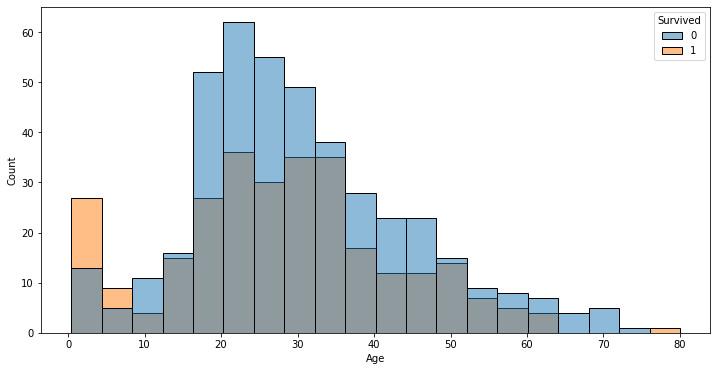

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Age', hue='Survived')
plt.show()

#### People at the age of 0-8 had a higher survival rate than others (also, according to the "Women and children first" rule)

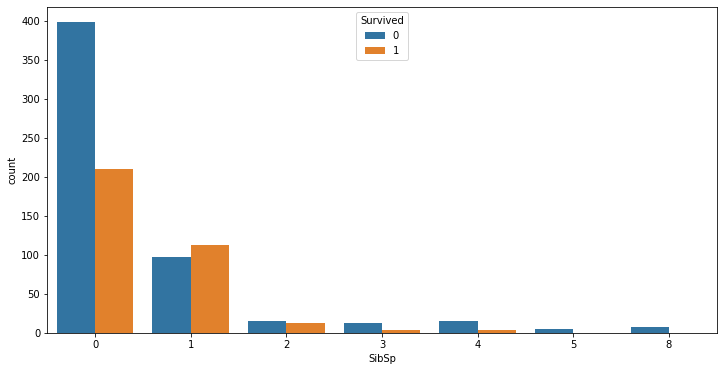

34.54% of people having 0 siblings/spouses aboard survived.
53.59% of people having 1 siblings/spouses aboard survived.
46.43% of people having 2 siblings/spouses aboard survived.
25.00% of people having 3 siblings/spouses aboard survived.
16.67% of people having 4 siblings/spouses aboard survived.
0.00% of people having 5 siblings/spouses aboard survived.
0.00% of people having 8 siblings/spouses aboard survived.


In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='SibSp', hue='Survived')
plt.show()
for sib_num in sorted(train_data['SibSp'].unique()):
    total = train_data[train_data['SibSp'] == sib_num].shape[0]
    survived = train_data[(train_data['SibSp'] == sib_num) & (train_data['Survived'] == 1)].shape[0]
    print(f'{(survived/total)*100:.2f}% of people having {sib_num} siblings/spouses aboard survived.')

#### People without any sibling/spouse aboard had a lower survival rate than those with 1 or 2 siblings/spouses. Maybe that's because the people with no siblings/spouses onboard were more willing to help others because they thought the had nothing to lose while the people with one sibling/spouse aboard were more willing to help the sibling/spouse rather than themselves, which would explain why the survival rate in that case was around 50%.

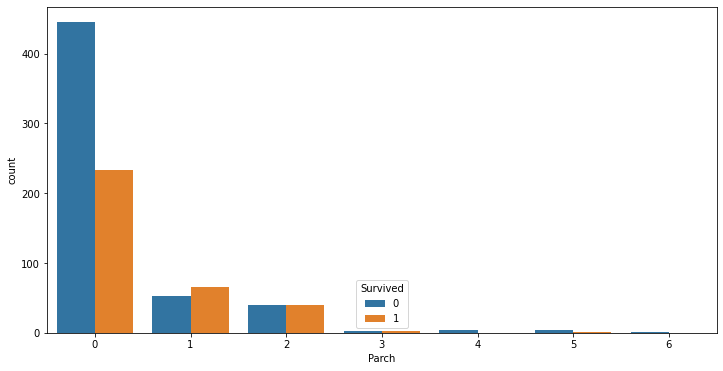

34.37% of people having 0 parents/children aboard survived.
55.08% of people having 1 parents/children aboard survived.
50.00% of people having 2 parents/children aboard survived.
60.00% of people having 3 parents/children aboard survived.
0.00% of people having 4 parents/children aboard survived.
20.00% of people having 5 parents/children aboard survived.
0.00% of people having 6 parents/children aboard survived.


In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Parch', hue='Survived')
plt.show()
for parch_num in sorted(train_data['Parch'].unique()):
    total = train_data[train_data['Parch'] == parch_num].shape[0]
    survived = train_data[(train_data['Parch'] == parch_num) & (train_data['Survived'] == 1)].shape[0]
    print(f'{(survived/total)*100:.2f}% of people having {parch_num} parents/children aboard survived.')

#### Just like above, people without any parent/child aboard were probably more likely to help others than themselves which greatly increased the death rate. People with one or two parents/children aboard had a higher survival rate.

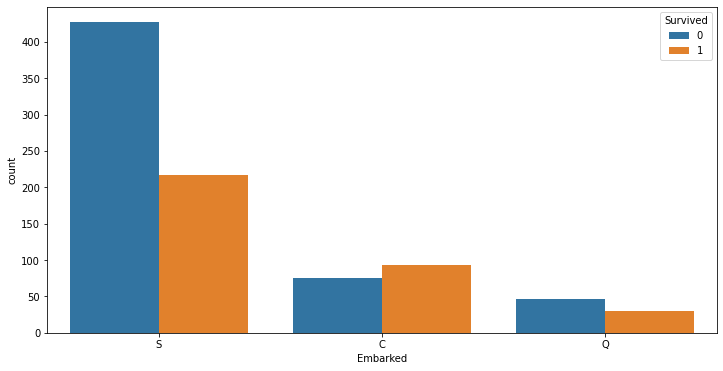

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Embarked', hue='Survived')
plt.show()

#### Most people embarked from Southampton but Cherbourg had the highest survival rate

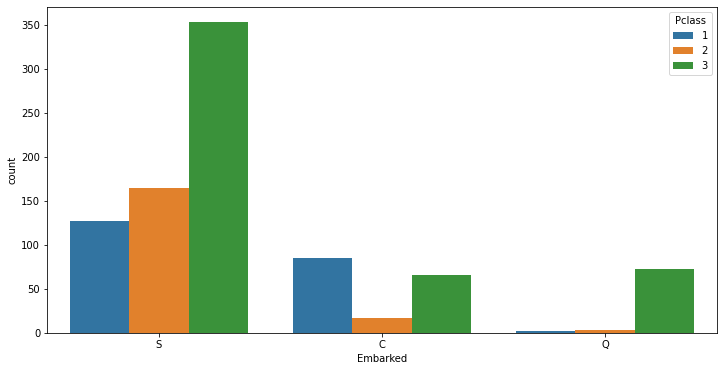

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Embarked', hue='Pclass')
plt.show()

#### People embarking from Southampton were mostly 3rd class passengers while those from Cherbourg were mostly 1st class passengers

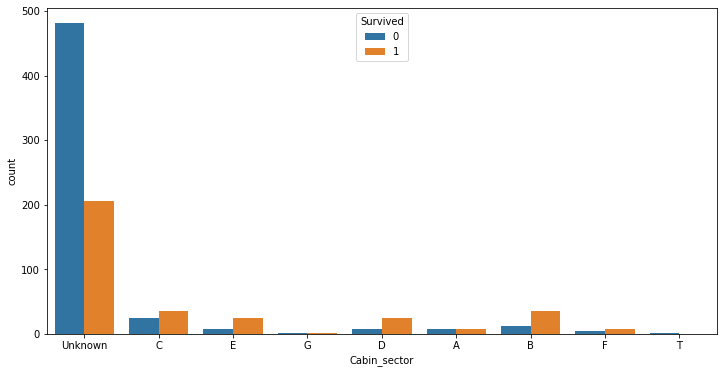

29.99% of people from Unknown sector survived.
59.32% of people from C sector survived.
75.00% of people from E sector survived.
50.00% of people from G sector survived.
75.76% of people from D sector survived.
46.67% of people from A sector survived.
74.47% of people from B sector survived.
61.54% of people from F sector survived.
0.00% of people from T sector survived.


In [87]:
train_data['Cabin_sector'] = train_data['Cabin'].apply(lambda x: x[0] if not(isinstance(x, float)) else 'Unknown')
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Cabin_sector', hue='Survived')
plt.show()
for sector in train_data['Cabin_sector'].unique():
    total = train_data[train_data['Cabin_sector'] == sector].shape[0]
    survived = train_data[(train_data['Cabin_sector'] == sector) & (train_data['Survived'] == 1)].shape[0]
    print(f'{(survived/total)*100:.2f}% of people from {sector} sector survived.')

#### Cabins were labeled as "letter + number" so I assumed the letter could be some kind of a sector of the ship. Checked if different sectors had different survival rates. Filled the missing value with the "Unknown" value - people with that value had the lowest survival rate.

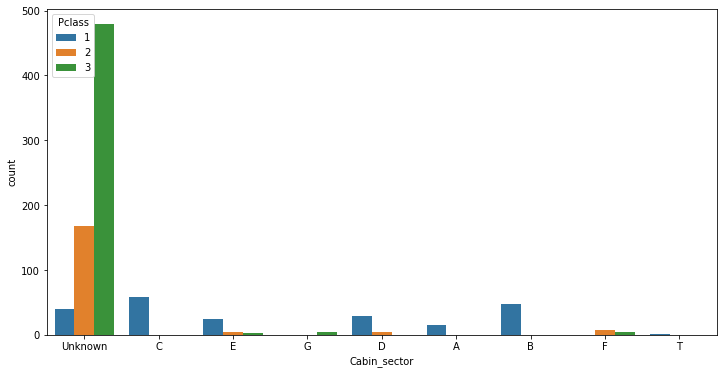

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Cabin_sector', hue='Pclass')
plt.show()

#### The "Unknown" cabins were mostly occupied by 3rd class passengers while the others were mostly occupied by 1st class passengers.

In [173]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
features = ['Age', 'Fare', 'Cabin', 'Sex', 'Embarked', 'Pclass']
X_train = train_data[features]
y_train = train_data['Survived'].values

def preprocessing(train, test):
    """
    This function transforms the train and test sets, returns the transformed copies of those.
    """
    copy_train = pd.DataFrame(train)
    copy_test = pd.DataFrame(test)
    copy_train['Cabin'] = copy_train['Cabin'].apply(lambda x: x[0] if not(isinstance(x, float)) else 'Unknown')
    copy_test['Cabin'] = copy_test['Cabin'].apply(lambda x: x[0] if not(isinstance(x, float)) else 'Unknown')
    
    num_features = ['Age', 'Fare']
    num_transformer = Pipeline(steps=[
        ('num_imputer', SimpleImputer(strategy='median'))])
    
    cat_features = ['Cabin', 'Sex', 'Embarked', 'Pclass']
    cat_transformer = Pipeline(steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot', OneHotEncoder(handle_unknown='ignore'))])
    
    preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])
    
    return preprocessor.fit_transform(copy_train), preprocessor.transform(copy_test)

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid = {'n_estimators' : [x for x in range(20, 201, 20)],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True, False],
              'random_state' : [0]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, cv=10)
grid_search.fit(preprocessing(X_train), y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best score: {best_score}')
print(f'Best params: {best_params}')

Best score: 0.8171285892634208
Best params: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 20, 'random_state': 0}


#### Hyperparameter tuning

In [185]:
X_test = test_data[features]

clf = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators=20, random_state=0)
X_train, X_test = preprocessing(X_train, X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
submission = pd.DataFrame(data=test_data['PassengerId'], columns=['PassengerId'])
submission[['Survived']] = y_pred
submission.to_csv('submission.csv', index=False)

#### Making the final prediction and saving it to a csv file.